# Library Import

In [780]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Setting Display Properties
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Suppress warnins
import warnings
warnings.filterwarnings('ignore')

In [638]:
rawdf = pd.read_csv("Leads.csv")

# Data Understanding

In [269]:
rawdf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [271]:
rawdf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [272]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

# Data Cleansing

In [548]:
print(rawdf['Do Not Email'].value_counts())
print(rawdf['Do Not Call'].value_counts())
print(rawdf['Search'].value_counts())
print(rawdf['Magazine'].value_counts())
print(rawdf['Newspaper Article'].value_counts())
print(rawdf['X Education Forums'].value_counts())
print(rawdf['Newspaper'].value_counts())
print(rawdf['Digital Advertisement'].value_counts())
print(rawdf['Through Recommendations'].value_counts())
print(rawdf['Receive More Updates About Our Courses'].value_counts())
print(rawdf['Update me on Supply Chain Content'].value_counts())
print(rawdf['Get updates on DM Content'].value_counts())
print(rawdf['I agree to pay the amount through cheque'].value_counts())
print(rawdf['A free copy of Mastering The Interview'].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


### We are removing few of the columns which doesn't have proper existence in their values. e.g. either Yes or No or negligible count for the secondary value

In [549]:
tempdf = rawdf.drop(columns=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',\
                             'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', \
                            'Update me on Supply Chain Content', 'Get updates on DM Content', \
                            'I agree to pay the amount through cheque'])

In [550]:
tempdf.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [551]:
100*round(tempdf.isna().sum()/len(tempdf),2)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Tags                                             36.0
Lead Quality                                     52.0
Lead Profile                                     29.0
City                        

### Dropping further columns which has 46% of data NULL

In [552]:
tempdf.drop(columns=['Asymmetrique Activity Index', 'Asymmetrique Profile Index', \
                     'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], \
           inplace=True)

In [553]:
100*round(tempdf['Country'].value_counts()/len(tempdf),2)

India                   70.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
France                   0.0
Oman                     0.0
unknown                  0.0
Germany                  0.0
Kuwait                   0.0
South Africa             0.0
Nigeria                  0.0
Canada                   0.0
Sweden                   0.0
Netherlands              0.0
Ghana                    0.0
Italy                    0.0
Belgium                  0.0
Uganda                   0.0
Bangladesh               0.0
China                    0.0
Asia/Pacific Region      0.0
Philippines              0.0
Sri Lanka                0.0
Kenya                    0.0
Denmark                  0.0
Russia                   0.0
Vietnam                  0.0
Malaysia                 0.0
Tanzania      

In [554]:
100*round(tempdf['Country'].value_counts()/len(tempdf[tempdf['Country'].notnull()]), 4)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
France                   0.09
Oman                     0.09
unknown                  0.07
Germany                  0.06
Kuwait                   0.06
South Africa             0.06
Nigeria                  0.06
Canada                   0.06
Sweden                   0.04
Netherlands              0.03
Ghana                    0.03
Italy                    0.03
Belgium                  0.03
Uganda                   0.03
Bangladesh               0.03
China                    0.03
Asia/Pacific Region      0.03
Philippines              0.03
Sri Lanka                0.01
Kenya                    0.01
Denmark                  0.01
Russia                   0.01
Vietnam                  0.01
Malaysia  

### Dropping Country as 95.77% is India from the Non-NULL values

In [555]:
tempdf.drop(columns=['Country'], inplace=True)

### For remaining columns any values which has total count of less than 200 we are going to merge all of those to a single value as ##_Others e.g. LA_Others, LAN_Others and rest wherever applicable.

In [556]:
tempdf['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [557]:
last_activity_counts = tempdf['Last Activity'].value_counts()
tempdf['Last Activity'].replace(last_activity_counts[last_activity_counts <= 200].index, 'LA_Others', inplace=True)
tempdf['Last Activity'].fillna("LA_Unknown", inplace=True)

In [558]:
tempdf['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Email Bounced               326
LA_Others                   321
Email Link Clicked          267
LA_Unknown                  103
Name: Last Activity, dtype: int64

In [559]:
tempdf['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [560]:
last_notable_activity_counts = tempdf['Last Notable Activity'].value_counts()
tempdf['Last Notable Activity'].replace(last_notable_activity_counts[last_notable_activity_counts <= 200].index, \
                                        'LNA_Others', inplace=True)

In [561]:
tempdf['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
LNA_Others                  516
Page Visited on Website     318
Name: Last Notable Activity, dtype: int64

In [562]:
tempdf['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [563]:
lead_origin_counts = tempdf['Lead Origin'].value_counts()
tempdf['Lead Origin'].replace(lead_origin_counts[lead_origin_counts <= 200].index, 'LO_Others', inplace=True)

In [564]:
tempdf['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
LO_Others                    56
Name: Lead Origin, dtype: int64

In [565]:
tempdf['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
youtubechannel          1
testone                 1
WeLearn                 1
Name: Lead Source, dtype: int64

In [566]:
lead_source_counts = tempdf['Lead Source'].value_counts()
tempdf['Lead Source'].replace(lead_source_counts[lead_source_counts <= 200].index, 'LS_Others', inplace=True)
tempdf['Lead Source'].replace(np.nan, 'Unknown_LS', inplace=True)

In [567]:
tempdf['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
LS_Others          350
Unknown_LS          36
Name: Lead Source, dtype: int64

In [568]:
tempdf['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### For Specialization column we can see NULL & Select values adds upto 3380 which is approx 30% of the total population. Moreover please note NULL and Select can be considered as identical. Hence merging all those to a new value as Unknown_Specialization

In [569]:
tempdf['Specialization'].replace(np.nan,'Unknown_Specialization', inplace=True)
tempdf['Specialization'].replace('Select','Unknown_Specialization', inplace=True)

specialization_count = tempdf['Specialization'].value_counts()
tempdf['Specialization'].replace(specialization_count[specialization_count <= 200].index, \
                                                  'Specialization_Others', inplace=True)
tempdf['Specialization'].value_counts()

Unknown_Specialization               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Specialization_Others                 833
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
Name: Specialization, dtype: int64

### Let's continue with more data cleansing as we go ahead with other columns where NULL data and SELECT is holding up good amount of dataset

In [570]:
100*round(tempdf.isna().sum()/len(tempdf),2)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     0.0
Specialization                                    0.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Tags                                             36.0
Lead Quality                                     52.0
Lead Profile                                     29.0
City                                             15.0
A free copy of Mastering The

In [571]:
tempdf['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

### More than 60% for "How did you hear about X Education" is Select and we can't manipulate this with any other ways like random variable or anything else. Hence dropping this too

In [572]:
tempdf.drop(columns=['How did you hear about X Education'], inplace=True)

In [573]:
tempdf['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### Now for Occupation we will club Student/Other/Housewife/Businessman in one group due to the low count and the NULL to Unknown to maintain the difference

In [574]:
occupation_counts = tempdf['What is your current occupation'].value_counts()
tempdf['What is your current occupation'].replace(occupation_counts[occupation_counts <= 300].index, \
                                                  'Ocupation_Others', inplace=True)
tempdf['What is your current occupation'].replace(np.nan, 'Unknown_Occupation', inplace=True)

In [575]:
tempdf['What is your current occupation'].value_counts()

Unemployed              5600
Unknown_Occupation      2690
Working Professional     706
Ocupation_Others         244
Name: What is your current occupation, dtype: int64

In [576]:
tempdf['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### Again for "What matters most to you in choosing a course" the variance of the values for Other AND Flexibility & Convenience is negligible and this column will not make and sense or difference in our analysis. Hence dropping this too.

In [577]:
tempdf.drop(columns=['What matters most to you in choosing a course'], inplace=True)

In [578]:
tempdf['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [579]:
tags_counts = tempdf['Tags'].value_counts()
tempdf['Tags'].replace(tags_counts[tags_counts <= 200].index, \
                       'Tags_Others', inplace=True)
tempdf['Tags'].replace(np.nan, 'Unknown_Tags', inplace=True)

In [580]:
tempdf['Tags'].value_counts()

Unknown_Tags                           3353
Will revert after reading the email    2072
Ringing                                1203
Tags_Others                            1036
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Name: Tags, dtype: int64

In [581]:
tempdf['Lead Quality'].value_counts()
tempdf['Lead Quality'].replace(np.nan, 'Unknown_LeadQuality', inplace=True)

In [582]:
tempdf['Lead Quality'].value_counts()

Unknown_LeadQuality    4767
Might be               1560
Not Sure               1092
High in Relevance       637
Worst                   601
Low in Relevance        583
Name: Lead Quality, dtype: int64

In [583]:
tempdf['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [584]:
tempdf['Lead Profile'].replace(np.nan, 'Unknown_LeadProfile', inplace=True)
tempdf['Lead Profile'].replace('Select', 'Unknown_LeadProfile', inplace=True)
tempdf['Lead Profile'].value_counts()

Unknown_LeadProfile            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [585]:
tempdf['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [586]:
tempdf['City'].replace(np.nan, 'Unknown_City', inplace=True)
tempdf['City'].replace('Select', 'Unknown_City',  inplace=True)
print(tempdf['City'].value_counts())
100*round(len(tempdf[tempdf['City'] == 'Unknown_City'])/len(tempdf),2)

Unknown_City                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


40.0

### 40% of the City is Unknown hence dropping this too

In [587]:
tempdf.drop(columns=['City'], inplace=True)

In [588]:
tempdf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown_Specialization,Unemployed,Interested in other courses,Low in Relevance,Unknown_LeadProfile,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown_Specialization,Unemployed,Ringing,Unknown_LeadQuality,Unknown_LeadProfile,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Ocupation_Others,Will revert after reading the email,Might be,Potential Lead,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,LA_Others,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown_LeadProfile,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown_Specialization,Unemployed,Will revert after reading the email,Might be,Unknown_LeadProfile,No,Modified


In [589]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Tags                                      9240 non-null object
Lead Quality                              9240 non-null object
Lead Profile

### For the columns TotalVisits & Page Views Per Visit are having around 137 rows with NULL values which is very less in comparison to the whole dataset. Hence, we are dropping those NULL records

In [590]:
tempdf = tempdf[(~np.isnan(tempdf['TotalVisits'])) & (~np.isnan(tempdf['Page Views Per Visit']))]

## Outlier analysis

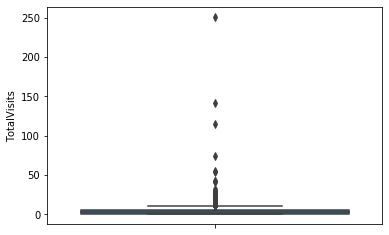

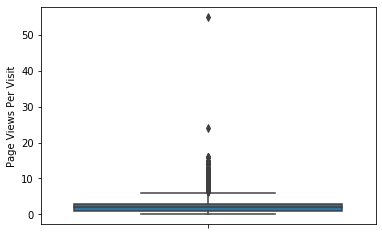

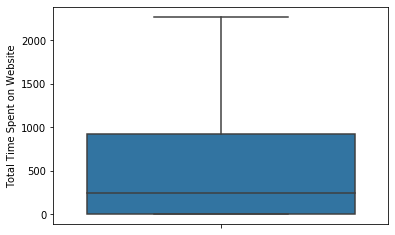

In [591]:
sns.boxplot(y='TotalVisits', data=tempdf)
plt.show()

sns.boxplot(y='Page Views Per Visit', data=tempdf)
plt.show()

sns.boxplot(y='Total Time Spent on Website', data=tempdf)
plt.show()

### Looking into the boxplots we are considering to remove the outliers for TotalVisits & Page views Per Visit with 0.05 %

In [592]:
totalvisit_q3 = tempdf["TotalVisits"].quantile(0.95)
pageview_q3 = tempdf["Page Views Per Visit"].quantile(0.95)
tempdf = tempdf[(tempdf["TotalVisits"] <= totalvisit_q3) & (tempdf["Page Views Per Visit"] <= pageview_q3)]

In [593]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 17 columns):
Prospect ID                               8474 non-null object
Lead Number                               8474 non-null int64
Lead Origin                               8474 non-null object
Lead Source                               8474 non-null object
Do Not Email                              8474 non-null object
Converted                                 8474 non-null int64
TotalVisits                               8474 non-null float64
Total Time Spent on Website               8474 non-null int64
Page Views Per Visit                      8474 non-null float64
Last Activity                             8474 non-null object
Specialization                            8474 non-null object
What is your current occupation           8474 non-null object
Tags                                      8474 non-null object
Lead Quality                              8474 non-null object
Lead Profile

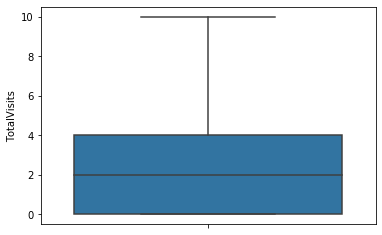

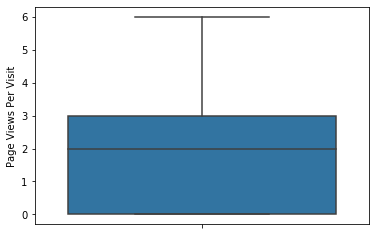

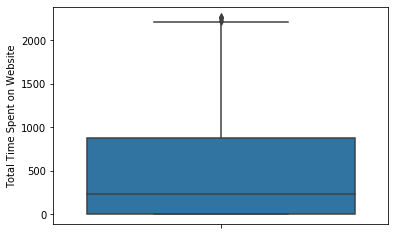

In [594]:
sns.boxplot(y='TotalVisits', data=tempdf)
plt.show()

sns.boxplot(y='Page Views Per Visit', data=tempdf)
plt.show()

sns.boxplot(y='Total Time Spent on Website', data=tempdf)
plt.show()

In [595]:
print(tempdf["Prospect ID"].is_unique)
print(tempdf["Lead Number"].is_unique)

True
True


### We observed Prospect ID & Lean Number is UNIQUE and can be the used as Identity in future purpose. Hence, preserving these columns for future use.

In [596]:
final_leads = tempdf.drop(columns=["Prospect ID", "Lead Number"])

In [597]:
final_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 15 columns):
Lead Origin                               8474 non-null object
Lead Source                               8474 non-null object
Do Not Email                              8474 non-null object
Converted                                 8474 non-null int64
TotalVisits                               8474 non-null float64
Total Time Spent on Website               8474 non-null int64
Page Views Per Visit                      8474 non-null float64
Last Activity                             8474 non-null object
Specialization                            8474 non-null object
What is your current occupation           8474 non-null object
Tags                                      8474 non-null object
Lead Quality                              8474 non-null object
Lead Profile                              8474 non-null object
A free copy of Mastering The Interview    8474 non-null object
Last Notabl

In [598]:
final_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown_Specialization,Unemployed,Interested in other courses,Low in Relevance,Unknown_LeadProfile,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown_Specialization,Unemployed,Ringing,Unknown_LeadQuality,Unknown_LeadProfile,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Ocupation_Others,Will revert after reading the email,Might be,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,LA_Others,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown_LeadProfile,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown_Specialization,Unemployed,Will revert after reading the email,Might be,Unknown_LeadProfile,No,Modified


### Current lead conversion rate

In [634]:
print(100*round(sum(final_leads['Converted'])/len(final_leads),2))

38.0


# Data Preparation
#### Making data ready for model application

### Conversion of column data with binary values

In [599]:
final_leads[['Do Not Email', 'A free copy of Mastering The Interview']] = \
final_leads[['Do Not Email', 'A free copy of Mastering The Interview']].apply(lambda x:x.map({'Yes': 1, "No": 0}))

In [600]:
final_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown_Specialization,Unemployed,Interested in other courses,Low in Relevance,Unknown_LeadProfile,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unknown_Specialization,Unemployed,Ringing,Unknown_LeadQuality,Unknown_LeadProfile,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Ocupation_Others,Will revert after reading the email,Might be,Potential Lead,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,LA_Others,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown_LeadProfile,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unknown_Specialization,Unemployed,Will revert after reading the email,Might be,Unknown_LeadProfile,0,Modified


### Dummy variable creation

### Initially we have manipulated the data on few  columns with "Others/Unknown" values hence, deleting "Others/Unknown" dummy column to be clean and simple

In [601]:
LO_dummies = pd.get_dummies(final_leads['Lead Origin'], prefix='LeadOrigin')
LO_dummies.drop(columns=['LeadOrigin_LO_Others'], inplace=True)

In [602]:
LS_dummies = pd.get_dummies(final_leads['Lead Source'], prefix='LeadSource')
LS_dummies.drop(columns=['LeadSource_Unknown_LS'], inplace=True)

In [604]:
LA_dummies = pd.get_dummies(final_leads['Last Activity'], prefix='LastActivity')
LA_dummies.drop(columns=['LastActivity_LA_Others'], inplace=True)

In [605]:
Specialization_dummies = pd.get_dummies(final_leads['Specialization'], prefix='Specialization')
Specialization_dummies.drop(columns=['Specialization_Unknown_Specialization'], inplace=True)

In [606]:
Occupation_dummies = pd.get_dummies(final_leads['What is your current occupation'], prefix='Occupation')
Occupation_dummies.drop(columns=['Occupation_Unknown_Occupation'], inplace=True)

In [607]:
Tags_dummies = pd.get_dummies(final_leads['Tags'], prefix='Tags')
Tags_dummies.drop(columns=['Tags_Unknown_Tags'], inplace=True)

In [613]:
LQ_dummies = pd.get_dummies(final_leads['Lead Quality'], prefix='LeadQuality')
LQ_dummies.drop(columns=['LeadQuality_Unknown_LeadQuality'], inplace=True)

In [614]:
LP_dummies = pd.get_dummies(final_leads['Lead Profile'], prefix='LeadProfile')
LP_dummies.drop(columns=['LeadProfile_Unknown_LeadProfile'], inplace=True)

In [608]:
LNA_dummies = pd.get_dummies(final_leads['Last Notable Activity'], prefix='LastNotableActivity')
LNA_dummies.drop(columns=['LastNotableActivity_LNA_Others'], inplace=True)

In [617]:
final_leads = pd.concat([final_leads, LO_dummies, LS_dummies, LA_dummies, Specialization_dummies, Occupation_dummies \
                        , Tags_dummies, LQ_dummies, LP_dummies, LNA_dummies], axis=1)

In [616]:
final_leads.shape

(8474, 15)

In [620]:
final_leads.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', \
                          'Tags', 'Lead Quality', 'Lead Profile', 'Last Notable Activity'], inplace=True)

In [621]:
final_leads.shape

(8474, 57)

In [622]:
final_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 57 columns):
Do Not Email                                        8474 non-null int64
Converted                                           8474 non-null int64
TotalVisits                                         8474 non-null float64
Total Time Spent on Website                         8474 non-null int64
Page Views Per Visit                                8474 non-null float64
A free copy of Mastering The Interview              8474 non-null int64
LeadOrigin_API                                      8474 non-null uint8
LeadOrigin_Landing Page Submission                  8474 non-null uint8
LeadOrigin_Lead Add Form                            8474 non-null uint8
LeadSource_Direct Traffic                           8474 non-null uint8
LeadSource_Google                                   8474 non-null uint8
LeadSource_LS_Others                                8474 non-null uint8
LeadSource_Olark Chat    

# Training and Test Data Set Split

In [625]:
# Creating depedent and independent variable
y = final_leads['Converted']
X = final_leads.drop(columns=['Converted'])

In [628]:
# Test and Train data set splitting
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [632]:
scaler = StandardScaler()

numeric_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_LS_Others,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Ocupation_Others,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Tags_Others,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst,LeadProfile_Dual Specialization Student,LeadProfile_Lateral Student,LeadProfile_Other Leads,LeadProfile_Potential Lead,LeadProfile_Student of SomeSchool,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent
4329,0,0.102041,1.661198,0.554013,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5793,0,-1.181084,-0.862145,-1.253883,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
435,0,0.529750,-0.343448,1.156645,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8958,0,0.529750,0.751170,-0.048619,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4266,0,0.529750,-0.310222,1.156645,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Correlation coefficients among the variables

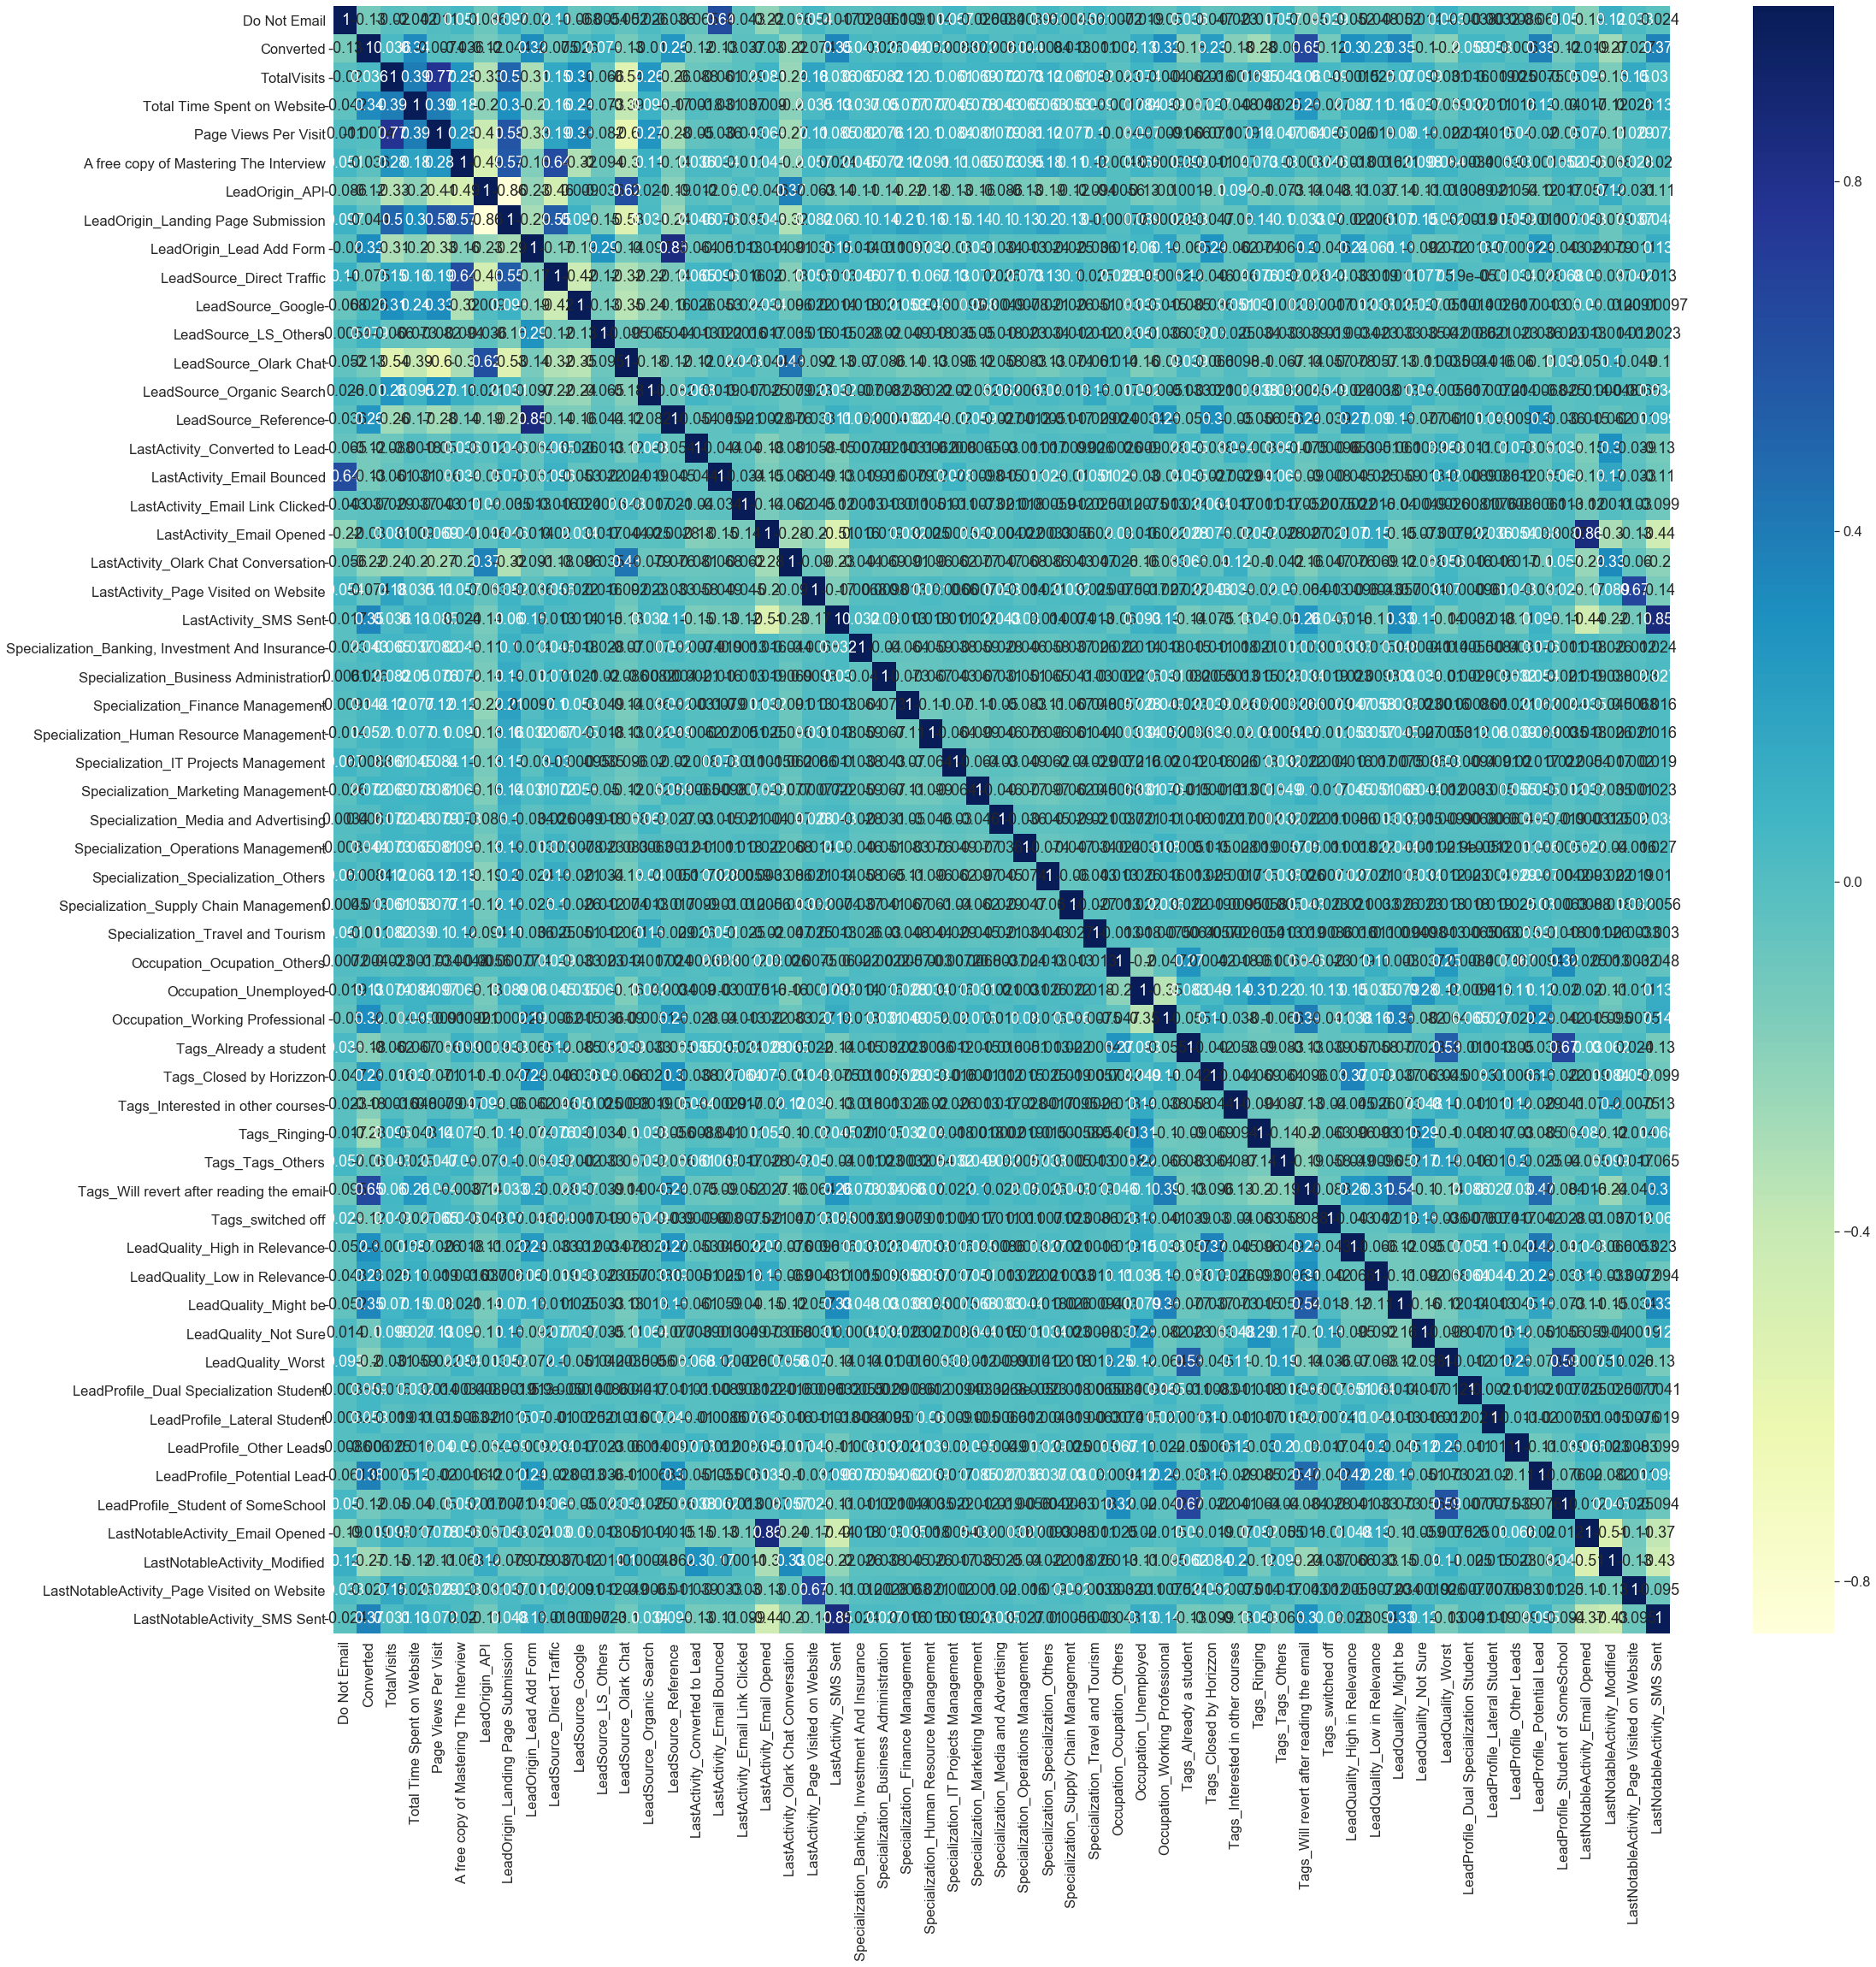

In [636]:
plt.figure(figsize = (35, 35))
#sns.set(font_scale=1.5)
sns.heatmap(final_leads.corr(), annot = True, cmap="YlGnBu")
plt.show()

### There are many variable which are highly correlated to each other.

# Model Building

### Running 1st Training Model

In [851]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5874
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1162.8
Date:                Mon, 18 Nov 2019   Deviance:                       2325.6
Time:                        10:56:31   Pearson chi2:                 8.62e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.4980      1.607     -0.932      0.351      -4.648       1.652
Do Not Email                                        -1.4012      0.311     -4.504      0.000      -2.011      -0.791
TotalVisits                                          0.2564      0.089      2.890      0.004       0.083       0.430
Total Time Spent on Website                          1.1122      0.064     17.257      0.000       0.986       1.239
Page Views Per Visit                                -0.2640      0.102     -2.580      0.010      -0.464      -0.063
A free copy of Mastering The Interview              -0.0086      0.182     -0.047      0.962      -0.366       0.349
LeadOrigin_API                                       0.5159      0.822      0.627      0.530      -1.096       2.128
LeadOrigin_Landing Page Submission                   0.3672      0.837      0.439      0.661      -1.273       2.007
LeadOrigin_Lead Add Form                             3.7747      0.899      4.198      0.000       2.012       5.537
LeadSource_Direct Traffic                           -0.8284      1.562     -0.530      0.596      -3.890       2.233
LeadSource_Google                                   -0.8460      1.558     -0.543      0.587      -3.899       2.207
LeadSource_LS_Others                                -0.3737      1.504     -0.248      0.804      -3.322       2.574
LeadSource_Olark Chat                                0.2256      1.566      0.144      0.885      -2.844       3.295
LeadSource_Organic Search                           -0.8808      1.562     -0.564      0.573      -3.942       2.181
LeadSource_Reference                                -2.0157      1.533     -1.315      0.189      -5.020       0.989
LastActivity_Converted to Lead                      -0.6722      0.423     -1.588      0.112      -1.502       0.157
LastActivity_Email Bounced                          -0.5069      0.590     -0.859      0.390      -1.663       0.650
LastActivity_Email Link Clicked                     -0.5277      0.449     -1.175      0.240      -1.408       0.353
LastActivity_Email Opened                            0.1084      0.377      0.287      0.774      -0.631       0.848
LastActivity_Olark Chat Conversation                -1.5781      0.385     -4.097      0.000      -2.333      -0.823
LastActivity_Page Visited on Website                -0.4248      0.470     -0.905      0.366      -1.345       0.496
LastActivity_SMS Sent                                0.7844      0.370      2.119      0.034       0.059       1.510
Specialization_Banking, Investment And Insurance     0.2466      0.377      0.654      0.513      -0.492       0.986
Specialization_Business Administration   

### Feature Selection using RFE

In [852]:
logreg = LogisticRegression()
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [853]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 27),
 ('LeadOrigin_API', False, 7),
 ('LeadOrigin_Landing Page Submission', False, 6),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Google', True, 1),
 ('LeadSource_LS_Others', False, 24),
 ('LeadSource_Olark Chat', False, 5),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Reference', True, 1),
 ('LastActivity_Converted to Lead', False, 4),
 ('LastActivity_Email Bounced', False, 11),
 ('LastActivity_Email Link Clicked', False, 12),
 ('LastActivity_Email Opened', False, 18),
 ('LastActivity_Olark Chat Conversation', True, 1),
 ('LastActivity_Page Visited on Website', False, 14),
 ('LastActivity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 9),
 ('Specialization_Business Administration', False, 19),
 ('Special

In [854]:
significant_feature = X_train.columns[rfe.support_]

In [855]:
# Features not getting selected in top 25 features
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'LeadOrigin_API', 'LeadOrigin_Landing Page Submission', 'LeadSource_LS_Others', 'LeadSource_Olark Chat', 'LastActivity_Converted to Lead', 'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked', 'LastActivity_Email Opened', 'LastActivity_Page Visited on Website', 'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration', 'Specialization_Finance Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Specialization_Others', 'Tags_Tags_Others', 'LeadQuality_Low in Relevance', 'LeadQuality_Might be', 'LeadQuality_Not Sure', 'LeadProfile_Dual Specialization Student', 'LeadProfile_Other Leads', 'LeadProfile_Potential Lead', 'LeadProfile_Student of SomeSchool',
       'LastNotableActivity

### Model assesment with Statsmodel

### Running 2nd Training Model

In [856]:
X_train_sm = sm.add_constant(X_train[significant_feature])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5905
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1195.5
Date:                Mon, 18 Nov 2019   Deviance:                       2390.9
Time:                        10:56:33   Pearson chi2:                 7.46e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9580      0.134     -7.132      0.000      -1.221      -0.695
Do Not Email                                -1.4716      0.254     -5.792      0.000      -1.970      -0.974
Total Time Spent on Website                  1.0877      0.062     17.658      0.000       0.967       1.208
LeadOrigin_Lead Add Form                     2.9744      0.595      4.998      0.000       1.808       4.141
LeadSource_Direct Traffic                   -1.4328      0.170     -8.415      0.000      -1.767      -1.099
LeadSource_Google                           -1.2651      0.160     -7.905      0.000      -1.579      -0.951
LeadSource_Organic Search                   -1.3169      0.207     -6.353      0.000      -1.723      -0.911
LeadSource_Reference                        -1.9754      0.732     -2.700      0.007      -3.409      -0.541
LastActivity_Olark Chat Conversation        -1.2459      0.244     -5.101      0.000      -1.725      -0.767
LastActivity_SMS Sent                        1.0224      0.222      4.601      0.000       0.587       1.458
Specialization_Supply Chain Management      -0.7318      0.332     -2.202      0.028      -1.383      -0.081
Specialization_Travel and Tourism           -0.8036      0.416     -1.932      0.053      -1.619       0.012
Occupation_Ocupation_Others                  0.8836      0.454      1.944      0.052      -0.007       1.774
Occupation_Unemployed                        1.4954      0.121     12.358      0.000       1.258       1.733
Occupation_Working Professional              1.7186      0.341      5.035      0.000       1.050       2.388
Tags_Already a student                      -3.4789      0.748     -4.652      0.000      -4.945      -2.013
Tags_Closed by Horizzon                      5.2360      1.033      5.066      0.000       3.210       7.262
Tags_Interested in other courses            -3.4946      0.507     -6.898      0.000      -4.488      -2.502
Tags_Ringing                                -4.6468      0.288    -16.116      0.000      -5.212      -4.082
Tags_Will revert after reading the email     3.3342      0.206     16.157      0.000       2.930       3.739
Tags_switched off                           -4.8789      0.749     -6.514      0.000      -6.347      -3.411
LeadQuality_High in Relevance                0.7174      0.391      1.835      0.066      -0.049       1.484
LeadQuality_Worst                           -2.5105      0.443     -5.663      0.000      -3.379      -1.642
LeadProfile_Lateral Student                 24.9981   1.67e+04      0.001      0.999   -3.28e+04    3.28e+04
LastNotableActivity_Modified                -0.7197      0.145     -4.976      0.000      -1.003      -0.436
LastNotableActivity_SMS Sent   

### Insignificant feature: LeadProfile_Lateral Student

In [857]:
significant_feature = significant_feature.drop("LeadProfile_Lateral Student")

### Running 3rd Training Model

In [858]:
X_train_sm = sm.add_constant(X_train[significant_feature])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5906
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.9
Date:                Mon, 18 Nov 2019   Deviance:                       2399.8
Time:                        10:56:33   Pearson chi2:                 7.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9634      0.134     -7.178      0.000      -1.226      -0.700
Do Not Email                                -1.4700      0.254     -5.787      0.000      -1.968      -0.972
Total Time Spent on Website                  1.0826      0.061     17.634      0.000       0.962       1.203
LeadOrigin_Lead Add Form                     2.9803      0.595      5.011      0.000       1.815       4.146
LeadSource_Direct Traffic                   -1.4281      0.170     -8.405      0.000      -1.761      -1.095
LeadSource_Google                           -1.2472      0.160     -7.814      0.000      -1.560      -0.934
LeadSource_Organic Search                   -1.3098      0.207     -6.329      0.000      -1.715      -0.904
LeadSource_Reference                        -1.9756      0.731     -2.702      0.007      -3.409      -0.543
LastActivity_Olark Chat Conversation        -1.2460      0.244     -5.104      0.000      -1.724      -0.768
LastActivity_SMS Sent                        1.0211      0.222      4.600      0.000       0.586       1.456
Specialization_Supply Chain Management      -0.7330      0.332     -2.211      0.027      -1.383      -0.083
Specialization_Travel and Tourism           -0.8049      0.416     -1.937      0.053      -1.619       0.010
Occupation_Ocupation_Others                  0.8785      0.454      1.936      0.053      -0.011       1.768
Occupation_Unemployed                        1.4956      0.121     12.369      0.000       1.259       1.733
Occupation_Working Professional              1.7173      0.341      5.036      0.000       1.049       2.386
Tags_Already a student                      -3.0282      0.622     -4.868      0.000      -4.248      -1.809
Tags_Closed by Horizzon                      5.2567      1.034      5.085      0.000       3.231       7.283
Tags_Interested in other courses            -3.4930      0.506     -6.900      0.000      -4.485      -2.501
Tags_Ringing                                -4.6451      0.288    -16.118      0.000      -5.210      -4.080
Tags_Will revert after reading the email     3.3361      0.206     16.173      0.000       2.932       3.740
Tags_switched off                           -4.8788      0.749     -6.517      0.000      -6.346      -3.412
LeadQuality_High in Relevance                0.7124      0.390      1.829      0.067      -0.051       1.476
LeadQuality_Worst                           -2.5333      0.442     -5.728      0.000      -3.400      -1.666
LastNotableActivity_Modified                -0.7220      0.144     -4.999      0.000      -1.005      -0.439
LastNotableActivity_SMS Sent                 1.0521      0.259      4.069      0.000       0.545       1.559
===============================

### Insignificant feature: LeadQuality_High in Relevance

### Running 4th Training Model

In [859]:
significant_feature = significant_feature.drop("LeadQuality_High in Relevance")

In [860]:
X_train_sm = sm.add_constant(X_train[significant_feature])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5907
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.7
Date:                Mon, 18 Nov 2019   Deviance:                       2403.4
Time:                        10:56:33   Pearson chi2:                 7.74e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9587      0.134     -7.152      0.000      -1.221      -0.696
Do Not Email                                -1.4833      0.255     -5.819      0.000      -1.983      -0.984
Total Time Spent on Website                  1.0822      0.061     17.636      0.000       0.962       1.203
LeadOrigin_Lead Add Form                     3.0107      0.594      5.065      0.000       1.846       4.176
LeadSource_Direct Traffic                   -1.4291      0.170     -8.415      0.000      -1.762      -1.096
LeadSource_Google                           -1.2436      0.159     -7.808      0.000      -1.556      -0.931
LeadSource_Organic Search                   -1.3183      0.207     -6.364      0.000      -1.724      -0.912
LeadSource_Reference                        -1.9403      0.730     -2.660      0.008      -3.370      -0.510
LastActivity_Olark Chat Conversation        -1.2360      0.243     -5.081      0.000      -1.713      -0.759
LastActivity_SMS Sent                        1.0388      0.222      4.688      0.000       0.605       1.473
Specialization_Supply Chain Management      -0.7230      0.332     -2.178      0.029      -1.374      -0.072
Specialization_Travel and Tourism           -0.8028      0.414     -1.939      0.052      -1.614       0.008
Occupation_Ocupation_Others                  0.8995      0.454      1.981      0.048       0.009       1.790
Occupation_Unemployed                        1.5128      0.121     12.552      0.000       1.277       1.749
Occupation_Working Professional              1.6816      0.343      4.906      0.000       1.010       2.353
Tags_Already a student                      -3.0253      0.622     -4.860      0.000      -4.245      -1.805
Tags_Closed by Horizzon                      5.6094      1.022      5.489      0.000       3.606       7.612
Tags_Interested in other courses            -3.4901      0.507     -6.887      0.000      -4.483      -2.497
Tags_Ringing                                -4.6577      0.288    -16.174      0.000      -5.222      -4.093
Tags_Will revert after reading the email     3.4170      0.203     16.828      0.000       3.019       3.815
Tags_switched off                           -4.8912      0.749     -6.534      0.000      -6.358      -3.424
LeadQuality_Worst                           -2.5508      0.443     -5.759      0.000      -3.419      -1.683
LastNotableActivity_Modified                -0.7381      0.144     -5.114      0.000      -1.021      -0.455
LastNotableActivity_SMS Sent                 1.0252      0.258      3.975      0.000       0.520       1.531
============================================================================================================
"""

### Insignificant feature: Specialization_Travel and Tourism

### Running 5th Training Model

In [861]:
significant_feature = significant_feature.drop("Specialization_Travel and Tourism")

In [862]:
X_train_sm = sm.add_constant(X_train[significant_feature])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5908
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.6
Date:                Mon, 18 Nov 2019   Deviance:                       2407.3
Time:                        10:56:34   Pearson chi2:                 7.71e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9549      0.134     -7.128      0.000      -1.217      -0.692
Do Not Email                                -1.4815      0.254     -5.841      0.000      -1.979      -0.984
Total Time Spent on Website                  1.0852      0.061     17.691      0.000       0.965       1.205
LeadOrigin_Lead Add Form                     3.0197      0.594      5.084      0.000       1.856       4.184
LeadSource_Direct Traffic                   -1.4519      0.170     -8.561      0.000      -1.784      -1.119
LeadSource_Google                           -1.2464      0.159     -7.830      0.000      -1.558      -0.934
LeadSource_Organic Search                   -1.3578      0.206     -6.587      0.000      -1.762      -0.954
LeadSource_Reference                        -1.9393      0.728     -2.662      0.008      -3.367      -0.512
LastActivity_Olark Chat Conversation        -1.2255      0.243     -5.043      0.000      -1.702      -0.749
LastActivity_SMS Sent                        1.0342      0.221      4.677      0.000       0.601       1.468
Specialization_Supply Chain Management      -0.6980      0.331     -2.108      0.035      -1.347      -0.049
Occupation_Ocupation_Others                  0.9167      0.455      2.016      0.044       0.026       1.808
Occupation_Unemployed                        1.5072      0.120     12.523      0.000       1.271       1.743
Occupation_Working Professional              1.6781      0.341      4.917      0.000       1.009       2.347
Tags_Already a student                      -3.0271      0.622     -4.865      0.000      -4.247      -1.808
Tags_Closed by Horizzon                      5.5995      1.022      5.479      0.000       3.596       7.603
Tags_Interested in other courses            -3.4834      0.507     -6.874      0.000      -4.477      -2.490
Tags_Ringing                                -4.6423      0.288    -16.139      0.000      -5.206      -4.079
Tags_Will revert after reading the email     3.3996      0.203     16.787      0.000       3.003       3.796
Tags_switched off                           -4.8785      0.748     -6.518      0.000      -6.345      -3.412
LeadQuality_Worst                           -2.5583      0.442     -5.790      0.000      -3.424      -1.692
LastNotableActivity_Modified                -0.7474      0.144     -5.180      0.000      -1.030      -0.465
LastNotableActivity_SMS Sent                 1.0207      0.257      3.966      0.000       0.516       1.525
============================================================================================================
"""

In [863]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[significant_feature].columns
vif['VIF'] = [variance_inflation_factor(X_train[significant_feature].values, i) \
              for i in range(X_train[significant_feature].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,LastNotableActivity_SMS Sent,6.71
8,LastActivity_SMS Sent,6.45
11,Occupation_Unemployed,4.93
2,LeadOrigin_Lead Add Form,4.01
6,LeadSource_Reference,3.74
17,Tags_Will revert after reading the email,2.76
20,LastNotableActivity_Modified,2.42
3,LeadSource_Direct Traffic,1.97
4,LeadSource_Google,1.97
12,Occupation_Working Professional,1.92


### We have few highly correlated feature like 
  - LastNotableActivity_SMS Sent
  - LastActivity_SMS Sent

### We will remove the 1st one and then rebuild our model

### Running 6th Training Model

In [864]:
significant_feature = significant_feature.drop("LastNotableActivity_SMS Sent")

In [865]:
X_train_sm = sm.add_constant(X_train[significant_feature])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5909
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1211.7
Date:                Mon, 18 Nov 2019   Deviance:                       2423.3
Time:                        10:56:34   Pearson chi2:                 7.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8850      0.132     -6.717      0.000      -1.143      -0.627
Do Not Email                                -1.4635      0.253     -5.774      0.000      -1.960      -0.967
Total Time Spent on Website                  1.0901      0.061     17.804      0.000       0.970       1.210
LeadOrigin_Lead Add Form                     3.0129      0.592      5.090      0.000       1.853       4.173
LeadSource_Direct Traffic                   -1.4468      0.168     -8.594      0.000      -1.777      -1.117
LeadSource_Google                           -1.2563      0.158     -7.927      0.000      -1.567      -0.946
LeadSource_Organic Search                   -1.3428      0.204     -6.575      0.000      -1.743      -0.943
LeadSource_Reference                        -1.9781      0.732     -2.703      0.007      -3.412      -0.544
LastActivity_Olark Chat Conversation        -1.0970      0.242     -4.527      0.000      -1.572      -0.622
LastActivity_SMS Sent                        1.7705      0.119     14.924      0.000       1.538       2.003
Specialization_Supply Chain Management      -0.7072      0.331     -2.138      0.033      -1.355      -0.059
Occupation_Ocupation_Others                  0.9904      0.458      2.162      0.031       0.092       1.888
Occupation_Unemployed                        1.5427      0.119     12.933      0.000       1.309       1.777
Occupation_Working Professional              1.7298      0.343      5.043      0.000       1.058       2.402
Tags_Already a student                      -3.1083      0.623     -4.986      0.000      -4.330      -1.886
Tags_Closed by Horizzon                      5.7159      1.023      5.587      0.000       3.711       7.721
Tags_Interested in other courses            -3.4789      0.508     -6.846      0.000      -4.475      -2.483
Tags_Ringing                                -4.5363      0.283    -16.030      0.000      -5.091      -3.982
Tags_Will revert after reading the email     3.4202      0.204     16.768      0.000       3.020       3.820
Tags_switched off                           -4.7500      0.745     -6.375      0.000      -6.210      -3.290
LeadQuality_Worst                           -2.5925      0.443     -5.851      0.000      -3.461      -1.724
LastNotableActivity_Modified                -1.0850      0.120     -9.039      0.000      -1.320      -0.850
============================================================================================================
"""

In [866]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[significant_feature].columns
vif['VIF'] = [variance_inflation_factor(X_train[significant_feature].values, i) \
              for i in range(X_train[significant_feature].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,4.86
2,LeadOrigin_Lead Add Form,4.00
6,LeadSource_Reference,3.74
17,Tags_Will revert after reading the email,2.76
3,LeadSource_Direct Traffic,1.96
4,LeadSource_Google,1.96
12,Occupation_Working Professional,1.90
20,LastNotableActivity_Modified,1.88
16,Tags_Ringing,1.80
19,LeadQuality_Worst,1.68


In [867]:
# Getting the predicted values on the train set
y_train_pred = res6.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.41812362, 0.99782922, 0.00403305, 0.04400204, 0.31099366,
       0.05346293, 0.94571503, 0.32500195, 0.00811452, 0.81584048])

### Creating Dataframe with the actual converted flag and predicted probabilities from 6th model

In [868]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.418124,4329,0
1,1,0.997829,5793,1
2,0,0.004033,435,0
3,0,0.044002,8958,0
4,1,0.310994,4266,0


## Accuracy, Sensitivity and Specificity -- Train Data

In [890]:
# Confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion1)

[[3517  186]
 [ 326 1902]]


In [891]:
# Predicted     not_converted    converted
# Actual
# not_converted        3517      186
# converted            326       1902  

In [892]:
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives

#### Accuracy

In [893]:
print(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2))

0.91


#### Sensitivity

In [894]:
print(round(TP1 / float(TP1+FN1),2))

0.85


#### Specificity

In [895]:
print(round(TN1 / float(TN1+FP1),2))

0.95


In [896]:
X_train_sm.head()

,const,Do Not Email,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,Specialization_Supply Chain Management,Occupation_Ocupation_Others,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_Worst,LastNotableActivity_Modified
4329,1.0,0,1.661198,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5793,1.0,0,-0.862145,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
435,1.0,0,-0.343448,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8958,1.0,0,0.751170,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4266,1.0,0,-0.310222,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Testing model on Test Data

#### Scaling of Test Data

In [897]:
scaler = StandardScaler()

numeric_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_LS_Others,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Ocupation_Others,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Tags_Others,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst,LeadProfile_Dual Specialization Student,LeadProfile_Lateral Student,LeadProfile_Other Leads,LeadProfile_Potential Lead,LeadProfile_Student of SomeSchool,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent
7709,0,0.558425,-0.582128,1.210310,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7125,0,0.126660,0.416572,0.596321,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6403,0,2.285486,1.431916,-0.263265,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
357,0,0.126660,-0.798513,0.596321,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9082,1,-0.736870,0.022640,-0.631658,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


#### Prediction on the Test Data

In [898]:
# Getting the predicted values on the test set
X_test_sm = sm.add_constant(X_test[significant_feature])
y_test_pred = res6.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.08282152, 0.99227584, 0.33918797, 0.00203394, 0.00271746,
       0.29688639, 0.00261437, 0.06838734, 0.95838963, 0.0516139 ])

In [899]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['Lead Number'] = y_test.index

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.082822,7709,0
1,1,0.992276,7125,1
2,0,0.339188,6403,0
3,0,0.002034,357,0
4,0,0.002717,9082,0


## Accuracy, Sensitivity and Specificity -- Test Data

In [900]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion2)

[[1510   70]
 [ 150  813]]


In [901]:
TP2 = confusion[1,1] # true positive 
TN2 = confusion[0,0] # true negatives
FP2 = confusion[0,1] # false positives
FN2 = confusion[1,0] # false negatives

#### Accuracy

In [902]:
print(round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted),2))

0.91


#### Sensitivity

In [903]:
print(round(TP2 / float(TP2+FN2),2))

0.84


#### Specificity

In [904]:
print(round(TN2 / float(TN2+FP2),2))

0.96


In [909]:
print(100*round(sum(y_train_pred_final['predicted'])/len(y_train_pred_final),2))

35.0


In [910]:
confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])

0.9109195402298851

# Finding Optimal Cutoff Point

In [911]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.418124,4329,0,1,1,1,1,1,0,0,0,0,0
1,1,0.997829,5793,1,1,1,1,1,1,1,1,1,1,1
2,0,0.004033,435,0,1,0,0,0,0,0,0,0,0,0
3,0,0.044002,8958,0,1,0,0,0,0,0,0,0,0,0
4,1,0.310994,4266,0,1,1,1,1,0,0,0,0,0,0


In [912]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375653  1.000000  0.000000
0.1   0.1  0.840668  0.977558  0.758304
0.2   0.2  0.895633  0.951526  0.862004
0.3   0.3  0.911651  0.919210  0.907102
0.4   0.4  0.918226  0.900808  0.928706
0.5   0.5  0.913674  0.853680  0.949770
0.6   0.6  0.910639  0.825404  0.961923
0.7   0.7  0.907436  0.797576  0.973535
0.8   0.8  0.899848  0.763914  0.981637
0.9   0.9  0.874726  0.681777  0.990818


<Figure size 1440x1440 with 0 Axes>

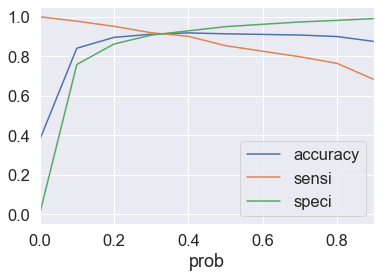

In [918]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (20, 20))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Above curve suggests the optimum point to take it as a cutoff probability.